In [548]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn import set_config

In [421]:
set_config(display = 'diagram')

In [422]:
train_df = pd.read_csv(r"C:\Users\arham\OneDrive\Desktop\DataSets\train.csv")
test_df = pd.read_csv(r"C:\Users\arham\OneDrive\Desktop\DataSets\test.csv")


In [423]:
df = pd.concat([train_df, test_df])

In [424]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S
441,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.5000,NaN,S
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S


In [425]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
train_df.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Since in the Embarked column less than 5% data is missing, it could be filled with mode of the column. As for Age column 19% data is missing filling it with mean or mode would not be a better choice as it would change the shape of the data. And the Cabin column more than 77% data is missing removing the whole column would be more better if any suitable imputation method is not found.

In [99]:
train_df['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [100]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [101]:
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

<Axes: xlabel='Fare', ylabel='Count'>

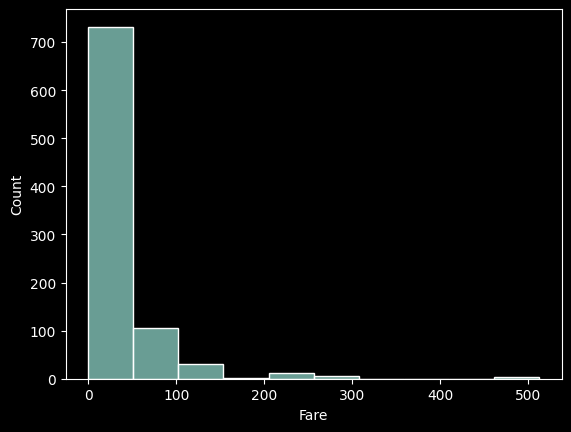

In [102]:
sns.histplot(train_df['Fare'], bins = 10)

In [103]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [426]:
train_df = train_df.drop(columns = ['PassengerId'])
test_df = test_df.drop(columns = ['PassengerId'])

In [108]:
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [46]:
train_df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [47]:
train_df['Fare'].max(), train_df['Fare'].min()

(512.3292, 0.0)

In [50]:
train_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [55]:
train_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

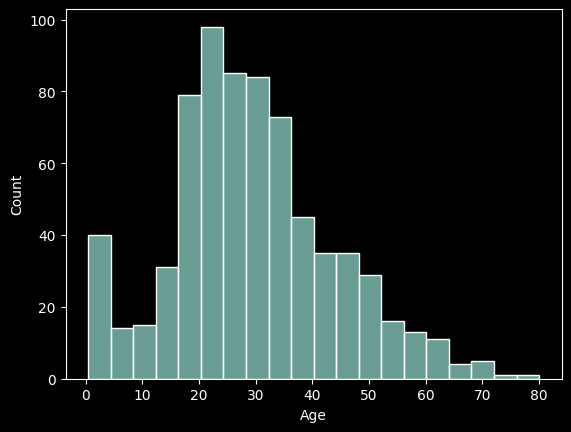

In [56]:
sns.histplot(train_df['Age'])

In [57]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [58]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Feature Engeneering

In [59]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [427]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = test_df['SibSp'] + train_df['Parch']+ 1

In [110]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [111]:
train_df['Family_Size'].value_counts()

Family_Size
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

<Axes: xlabel='Family_Size', ylabel='Count'>

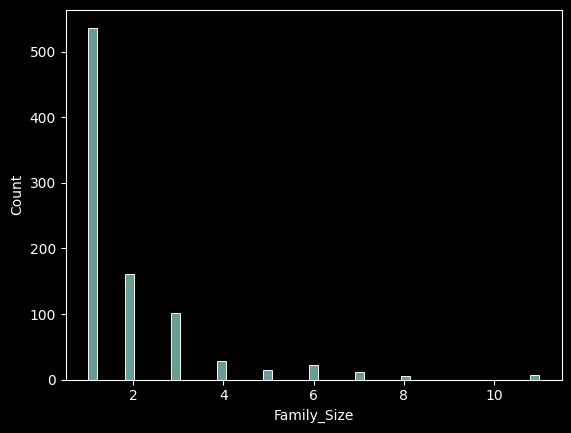

In [112]:
sns.histplot(train_df['Family_Size'])

In [428]:
bins = [0, 1, 4, 6, train_df['Family_Size'].max()]
labels = ['Alone', 'Small', 'Medium', 'Big']

train_df['Family_Bin'] = pd.cut(train_df['Family_Size'], bins = bins, labels = labels)
test_df['Family_Bin'] = pd.cut(test_df['Family_Size'], bins = bins, labels = labels)

In [114]:
train_df['Family_Bin'].describe()

count       891
unique        4
top       Alone
freq        537
Name: Family_Bin, dtype: object

In [429]:
train_df.groupby('Family_Bin')['Survived'].mean()

C:\Users\arham\AppData\Local\Temp\ipykernel_1832\1219629884.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Family_Bin
Alone     0.303538
Small     0.578767
Medium    0.162162
Big       0.160000
Name: Survived, dtype: float64

In [137]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Bin,Cabin_Num,Deck,Cabin_Known
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,NaN,NaN,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,NaN,NaN,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,123,C,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,NaN,NaN,0


In [118]:
train_df['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [430]:
train_df['Cabin_Num'] = train_df['Cabin'].str.extract(r'(\d+)').copy()
train_df['Deck'] = train_df['Cabin'].str[0].copy()


test_df['Cabin_Num'] = test_df['Cabin'].str.extract(r'(\d+)').copy()
test_df['Deck'] = test_df['Cabin'].str[0].copy()

In [127]:
train_df['Deck'].value_counts()

Deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [128]:
train_df.groupby('Deck')['Survived'].mean()

Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64

In [431]:
train_df['Cabin_Known'] = np.where(train_df['Cabin'].isnull(), 0, 1)
test_df['Cabin_Known'] = np.where(test_df['Cabin'].isnull(), 0, 1)

In [158]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Bin,Cabin_Num,Deck,Cabin_Known,Last_Name,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,NaN,NaN,0,Braund,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,85,C,1,Cumings,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,NaN,NaN,0,Heikkinen,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,123,C,1,Futrelle,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,NaN,NaN,0,Allen,Mr


In [198]:
train_df.groupby('Cabin_Known')['Survived'].mean()

Cabin_Known
0    0.299854
1    0.666667
Name: Survived, dtype: float64

It could be clearly seen that people with their cabin knowns have much higher survival rate in comprison to those having unknown cabins

In [432]:
train_df['Last_Name'] = train_df['Name'].str.split(',').str[0]
test_df['Last_Name'] = test_df['Name'].str.split(',').str[0]

In [200]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Bin,Cabin_Num,Deck,Cabin_Known,Last_Name
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,NaN,NaN,0,Braund
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,85,C,1,Cumings
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,NaN,NaN,0,Heikkinen
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,123,C,1,Futrelle
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,NaN,NaN,0,Allen


In [433]:
train_df['Title'] = train_df['Name'].str.split(',').str[1].str.split('.').str[0]
test_df['Title'] = test_df['Name'].str.split(',').str[1].str.split('.').str[0]

In [434]:
train_df['Name'] = train_df['Name'].str.split(',').str[1].str.split('.').str[1]
test_df['Name'] = test_df['Name'].str.split(',').str[1].str.split('.').str[1]

In [435]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Bin,Cabin_Num,Deck,Cabin_Known,Last_Name,Title
0,0,3,Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,NaN,NaN,0,Braund,Mr
1,1,1,John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,85,C,1,Cumings,Mrs
2,1,3,Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,NaN,NaN,0,Heikkinen,Miss
3,1,1,Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,2,Small,123,C,1,Futrelle,Mrs
4,0,3,William Henry,male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,NaN,NaN,0,Allen,Mr


In [403]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [167]:
train_df.groupby('Title')['Survived'].mean() > 0.4

Title
Capt            False
Col              True
Don             False
Dr               True
Jonkheer        False
Lady             True
Major            True
Master           True
Miss             True
Mlle             True
Mme              True
Mr              False
Mrs              True
Ms               True
Rev             False
Sir              True
the Countess     True
Name: Survived, dtype: bool

In [394]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Bin,Cabin_Num,Deck,Cabin_Known,Last_Name
0,0,3,Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,NaN,NaN,0,Braund
1,1,1,John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,85,C,1,Cumings
2,1,3,Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,NaN,NaN,0,Heikkinen
3,1,1,Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,2,Small,123,C,1,Futrelle
4,0,3,William Henry,male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,NaN,NaN,0,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,Juozas,male,27.0,0,0,211536,13.0000,NaN,S,1,Alone,NaN,NaN,0,Montvila
887,1,1,Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S,1,Alone,42,B,1,Graham
888,0,3,"Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,Small,NaN,NaN,0,Johnston
889,1,1,Karl Howell,male,26.0,0,0,111369,30.0000,C148,C,1,Alone,148,C,1,Behr


In [436]:
train_df['Title'] = train_df['Title'].str.strip()

In [437]:
titles = {'Mr', 'Miss', 'Mrs', 'Master', 'Pass'}
train_df['Title'] = train_df['Title'].apply(lambda x: x if x in titles else 'Other')

In [438]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Bin,Cabin_Num,Deck,Cabin_Known,Last_Name,Title
0,0,3,Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,NaN,NaN,0,Braund,Mr
1,1,1,John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,85,C,1,Cumings,Mrs
2,1,3,Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,NaN,NaN,0,Heikkinen,Miss
3,1,1,Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,2,Small,123,C,1,Futrelle,Mrs
4,0,3,William Henry,male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,NaN,NaN,0,Allen,Mr


In [406]:
train_df.groupby('Title')['Survived'].mean()

Title
Master    0.575000
Miss      0.697802
Mr        0.156673
Mrs       0.792000
Other     0.444444
Name: Survived, dtype: float64

In [244]:
train_df.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.773973
Mr        32.368090
Mrs       35.898148
Other     42.384615
Name: Age, dtype: float64

In [439]:
tr_mean_age = train_df.groupby('Title')['Age'].transform('mean')
te_mean_age = test_df.groupby('Title')['Age'].transform('mean')

train_df['Age'] = train_df['Age'].fillna(tr_mean_age)
test_df['Age'] = test_df['Age'].fillna(te_mean_age)

In [254]:
train_df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Family_Size,Family_Bin,Cabin_Num,Deck,Cabin_Known,Title
0,0,3,male,22.0,A/5 21171,7.2500,S,2,Small,NaN,NaN,0,Mr
1,1,1,female,38.0,PC 17599,71.2833,C,2,Small,85,C,1,Mrs
2,1,3,female,26.0,STON/O2. 3101282,7.9250,S,1,Alone,NaN,NaN,0,Miss
3,1,1,female,35.0,113803,53.1000,S,2,Small,123,C,1,Mrs
4,0,3,male,35.0,373450,8.0500,S,1,Alone,NaN,NaN,0,Mr


In [440]:
train_df['Age_Bin'] = pd.qcut(train_df['Age'], q=10, labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'])

In [441]:
test_df['Age_Bin'] = pd.qcut(test_df['Age'], q=10, labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'])

<Axes: xlabel='Age', ylabel='Count'>

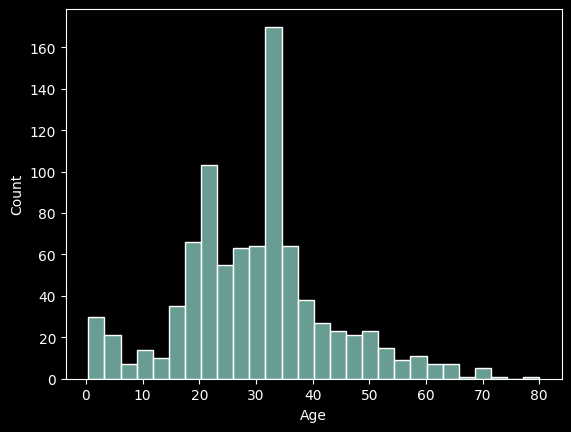

In [442]:
sns.histplot(train_df['Age'])

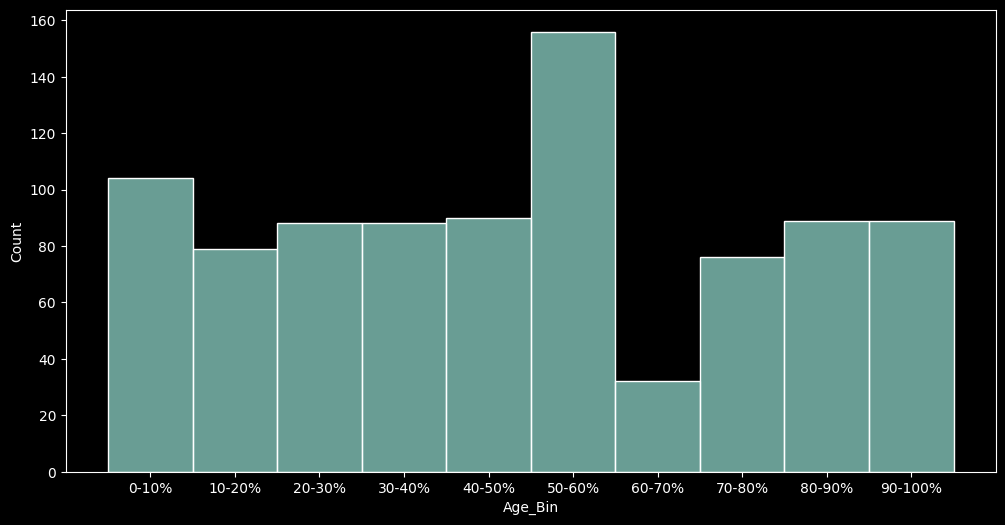

In [261]:
plt.figure(figsize= (12, 6))
sns.histplot(train_df['Age_Bin'])


plt.show()

In [267]:
train_df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Family_Size,Family_Bin,Cabin_Num,Deck,Cabin_Known,Title,Age_Bin
0,0,3,male,22.0,A/5 21171,7.2500,S,2,Small,NaN,NaN,0,Mr,20-30%
1,1,1,female,38.0,PC 17599,71.2833,C,2,Small,85,C,1,Mrs,70-80%
2,1,3,female,26.0,STON/O2. 3101282,7.9250,S,1,Alone,NaN,NaN,0,Miss,30-40%
3,1,1,female,35.0,113803,53.1000,S,2,Small,123,C,1,Mrs,70-80%
4,0,3,male,35.0,373450,8.0500,S,1,Alone,NaN,NaN,0,Mr,70-80%


In [268]:
train_df['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

<Axes: xlabel='Fare', ylabel='Count'>

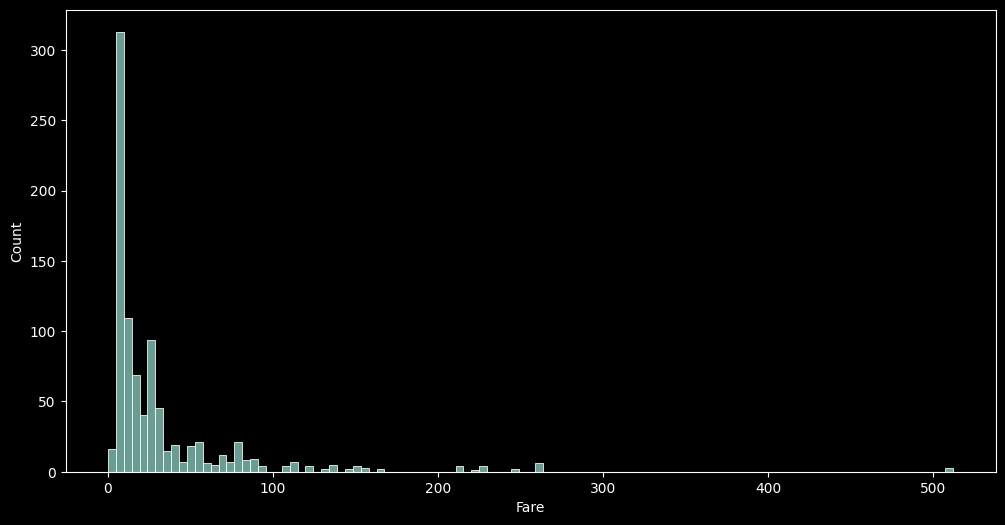

In [443]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['Fare'])

In [271]:
train_df['Fare'].mean()

32.204207968574636

In [272]:
train_df.groupby('Fare')['Survived'].mean()

Fare
0.0000      0.066667
4.0125      0.000000
5.0000      0.000000
6.2375      0.000000
6.4375      0.000000
              ...   
227.5250    0.750000
247.5208    0.500000
262.3750    1.000000
263.0000    0.500000
512.3292    1.000000
Name: Survived, Length: 248, dtype: float64

In [273]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Sex          891 non-null    object  
 3   Age          891 non-null    float64 
 4   Ticket       891 non-null    object  
 5   Fare         891 non-null    float64 
 6   Embarked     889 non-null    object  
 7   Family_Size  891 non-null    int64   
 8   Family_Bin   891 non-null    category
 9   Cabin_Num    200 non-null    object  
 10  Deck         204 non-null    object  
 11  Cabin_Known  891 non-null    int32   
 12  Title        891 non-null    object  
 13  Age_Bin      891 non-null    category
dtypes: category(2), float64(2), int32(1), int64(3), object(6)
memory usage: 82.5+ KB


In [444]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Bin,Cabin_Num,Deck,Cabin_Known,Last_Name,Title,Age_Bin
0,0,3,Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,NaN,NaN,0,Braund,Mr,20-30%
1,1,1,John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,85,C,1,Cumings,Mrs,70-80%
2,1,3,Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,NaN,NaN,0,Heikkinen,Miss,30-40%
3,1,1,Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,2,Small,123,C,1,Futrelle,Mrs,70-80%
4,0,3,William Henry,male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,NaN,NaN,0,Allen,Mr,70-80%


In [446]:
X = train_df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family_Size', 'Family_Bin', 'Cabin_Known', 'Title', 'Age_Bin']].copy()
y = train_df['Survived']

In [449]:
X.sample(5)

,Pclass,Sex,Age,Fare,Embarked,Family_Size,Family_Bin,Cabin_Known,Title,Age_Bin
580,2,female,25.0,30.0000,S,3,Small,0,Miss,30-40%
712,1,male,48.0,52.0000,S,2,Small,1,Mr,90-100%
587,1,male,60.0,79.2000,C,3,Small,1,Mr,90-100%
323,2,female,22.0,29.0000,S,3,Small,0,Mrs,20-30%
474,3,female,22.0,9.8375,S,1,Alone,0,Miss,20-30%


In [527]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [580]:
X_train.head(5)

,Pclass,Sex,Age,Fare,Embarked,Family_Size,Family_Bin,Cabin_Known,Title,Age_Bin
331,1,male,45.5,28.5000,S,1,Alone,1,Mr,80-90%
733,2,male,23.0,13.0000,S,1,Alone,0,Mr,30-40%
382,3,male,32.0,7.9250,S,1,Alone,0,Mr,50-60%
704,3,male,26.0,7.8542,S,2,Small,0,Mr,30-40%
813,3,female,6.0,31.2750,S,7,Big,0,Miss,0-10%


In [529]:
mode_value = X_train['Embarked'].mode()

if not mode_value.empty:
    # Fill NaN values with the mode
    X_train['Embarked'] = X_train['Embarked'].fillna(mode_value[0])
else:
    print("No mode found. The column may be empty or contain only NaNs.")

In [530]:
trf = ColumnTransformer(
    transformers = [
        ('cat_encoder_ohe', OneHotEncoder(sparse_output = False, drop = 'first'), ['Sex', 'Embarked', 'Title']),
        ('family_bin_encoder', OrdinalEncoder(categories = [['Alone', 'Small', 'Medium', 'Big']]), ['Family_Bin']),
        ('age_bin_encoder', OrdinalEncoder(categories = [['0-10%' , '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']]),
         ['Age_Bin']),
            
        ],
remainder = 'passthrough')

In [533]:
X_train_trans = trf.fit_transform(X_train)
X_test_trans = trf.transform(X_test)

In [534]:
columns = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family_Size', 'Family_Bin',
       'Cabin_Known', 'Title', 'Age_Bin']

In [535]:
# Get the new column names from each transformer


# OneHotEncoder for 'Sex', 'Embarked', and 'Title'
ohe_cols = trf.named_transformers_['cat_encoder_ohe'].get_feature_names_out(['Sex', 'Embarked', 'Title'])

# OrdinalEncoder for 'Family_Bin'
family_bin_col = ['Family_Bin']

# OrdinalEncoder for 'Age_Bin'
age_bin_col = ['Age_Bin']

# Remaining columns (those not transformed)
remainder_cols = X_train.columns.drop(['Sex', 'Embarked', 'Title', 'Family_Bin', 'Age_Bin'])

# Combine all column names
columns = list(ohe_cols) + family_bin_col + age_bin_col + list(remainder_cols)

In [536]:
# OneHotEncoder for 'Sex', 'Embarked', and 'Title'
ohe_cols_tr = trf.named_transformers_['cat_encoder_ohe'].get_feature_names_out(['Sex', 'Embarked', 'Title'])

# OrdinalEncoder for 'Family_Bin'
family_bin_col_tr = ['Family_Bin']

# OrdinalEncoder for 'Age_Bin'
age_bin_col_tr = ['Age_Bin']

# Remaining columns (those not transformed)
remainder_cols_tr = X_test.columns.drop(['Sex', 'Embarked', 'Title', 'Family_Bin', 'Age_Bin'])

# Combine all column names
columns_tr = list(ohe_cols_tr) + family_bin_col_tr + age_bin_col_tr + list(remainder_cols_tr)

In [537]:

X_train_trans = pd.DataFrame(X_train_trans, columns = columns).copy()
X_test_trans = pd.DataFrame(X_test_trans, columns = columns_tr).copy()

In [539]:
X_train_trans.sample(5)

,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Family_Bin,Age_Bin,Pclass,Age,Fare,Family_Size,Cabin_Known
468,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,8.0,3.0,42.00000,8.4042,2.0,0.0
480,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,8.0,3.0,45.00000,6.9750,1.0,0.0
314,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,3.0,32.36809,7.7750,1.0,0.0
492,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,18.00000,9.3500,2.0,0.0
689,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,3.0,32.00000,8.3625,1.0,0.0


In [538]:
X_test_trans.sample(5)

,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Family_Bin,Age_Bin,Pclass,Age,Fare,Family_Size,Cabin_Known
107,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,47.00000,38.5000,1.0,1.0
85,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,1.0,71.00000,49.5042,1.0,0.0
159,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,3.0,32.00000,15.5000,3.0,0.0
80,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,16.00000,39.6875,6.0,0.0
164,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,3.0,32.36809,8.4583,1.0,0.0


In [540]:
dlf = DecisionTreeClassifier()

In [543]:
dlf.fit(X_train_trans, y_train)

DecisionTreeClassifier()

In [572]:
y_pred = dlf.predict(X_test_trans)
y_proba = dlf.predict_proba(X_test_trans)[:, 1]

In [581]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 0.8268156424581006
Confusion Matrix: [[87 18]
 [13 61]]
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.83      0.85       105
           1       0.77      0.82      0.80        74

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.83      0.83      0.83       179



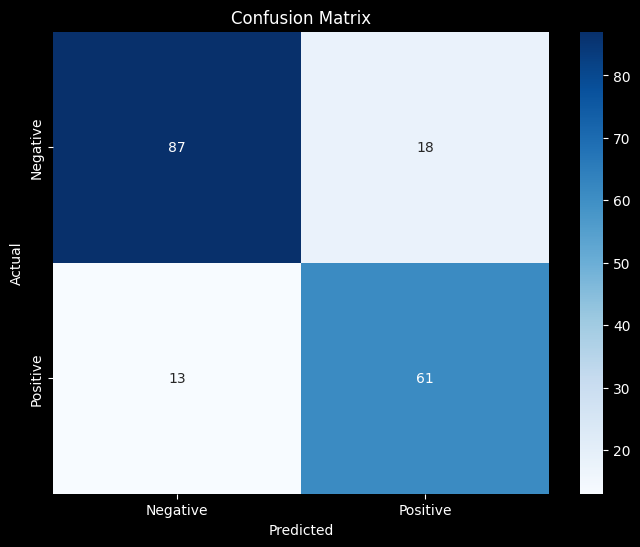

In [570]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


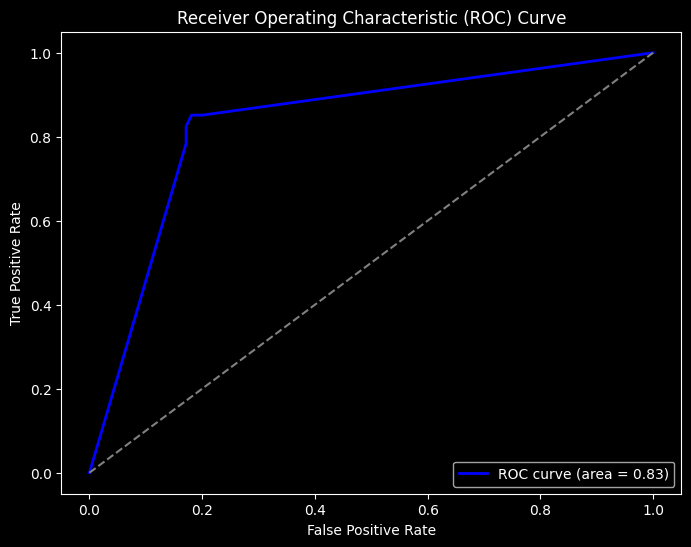

In [573]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


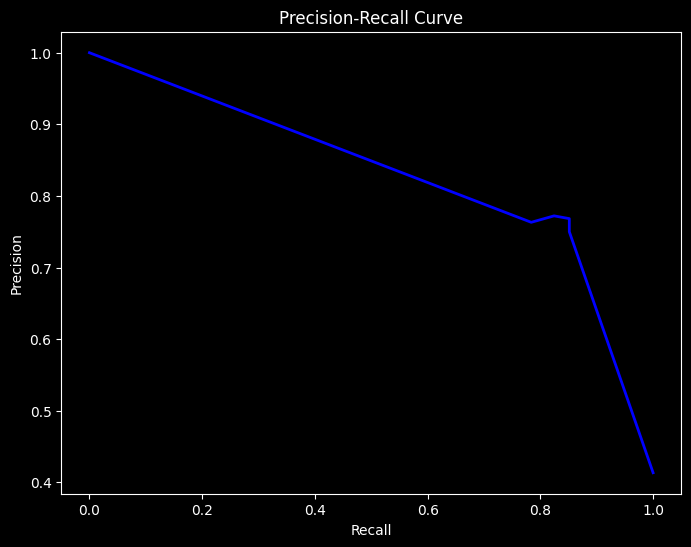

In [574]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

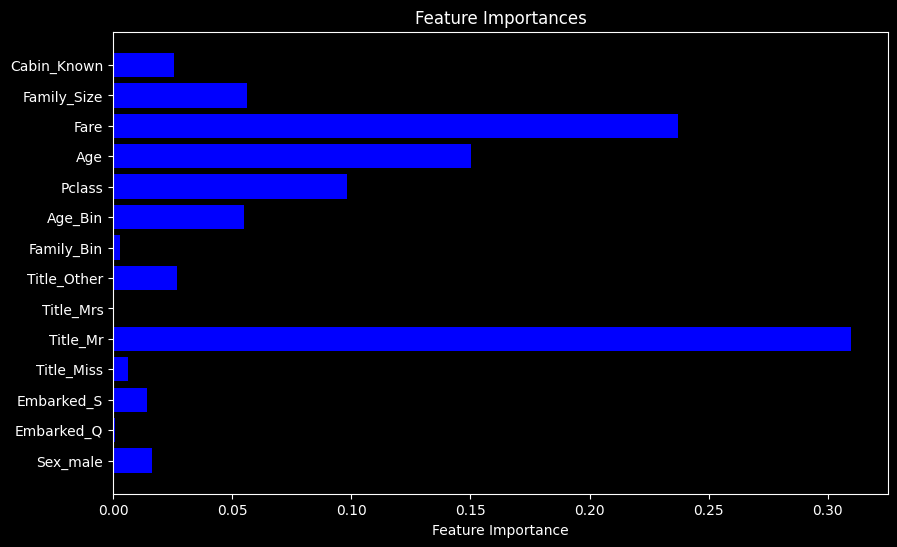

In [579]:
importances = dlf.feature_importances_
feature_names = X_train_trans.columns  # Use column names if X is a DataFrame

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='blue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()